<a href="https://colab.research.google.com/github/MashettyKeerthi/Credit-Risk-Prediction-and-Customer-Segmentation-for-Smarter-Lending-Decisions/blob/main/Credit_risk_prediction_and_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title : Credit Risk Prediction and Customer Segmentation for Smarter Lending Decisions**

**Problem Statement:**

Lending companies often face challenges in deciding which customers are safe to give loans to and how to group different types of customers for better services. In this project, we aim to do two things:


*   Predict which customers are risky and might not repay loans by analyzing their financial data.
*   
Group customers into similar segments based on their financial behaviour features. This helps the company understand different types of customers and create better loan plans or offers for them.



By doing both risk prediction and customer segmentation, we help the company make smarter lending decisions, reduce loan defaults, and improve customer experience.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

Imported necessary libraries for data analysis, visualization, preprocessing, model training, and evaluation using pandas, numpy, seaborn, matplotlib, and scikit-learn.

In [ ]:
#Uploading the dataset
from google.colab import files
uploaded= files.upload()

Saving Credit Scoring and Segmentation.csv to Credit Scoring and Segmentation (2).csv


The dataset was uploaded into the Colab environment for further analysis.

In [ ]:
#Loading the dataset
df=pd.read_csv('Credit Scoring and Segmentation.csv')

Loaded the dataset "Credit Scoring and Segmentation.csv" into a pandas DataFrame for preprocessing and analysis.

# **Data Preprocessing**

In [ ]:
# Understanding the data structure
df.shape

(1000, 12)

The dataset consists of 1,000 rows and 12 columns, representing customer records along with various financial and demographic features.

In [ ]:
print(df.head())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

Displayed the first few records to understand the data types, format, and values of each feature.

Below is the description of all the features in the data:

•	Age: This feature represents the age of the individual.

•	Gender: This feature captures the gender of the individual.

•	Marital Status: This feature denotes the marital status of the individual.

•	Education Level: This feature represents the highest level of education attained by the individual.

•	Employment Status: This feature indicates the current employment status of the individual.

•	Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.

•	Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.

•	Number of Credit Accounts: It represents the count of active credit accounts the person holds.

•	Loan Amount: It indicates the monetary value of the loan.

•	Interest Rate: This feature represents the interest rate associated with the loan.

•	Loan Term: This feature denotes the duration or term of the loan.

•	Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.



Now let’s have a look at column insights before moving forward:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


Used .info() to identify the data types of columns and check for any missing values.Upon examining the dataset, we observed that it comprises 12 features with 1000 entries each. The data types present are integer, float, and object. Furthermore, the dataset does not contain any null or missing values.

In [ ]:
# Statistical Analysis
df.describe(include="all")

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
count,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000
unique,NaN,2,3,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Male,Married,Master,Self-Employed,NaN,NaN,NaN,NaN,NaN,NaN,Auto Loan
freq,NaN,501,350,262,347,NaN,NaN,NaN,NaN,NaN,NaN,348
mean,42.702000,NaN,NaN,NaN,NaN,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000,NaN
std,13.266771,NaN,NaN,NaN,NaN,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274,NaN
min,20.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000,NaN
50%,42.000000,NaN,NaN,NaN,NaN,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000,NaN
75%,54.000000,NaN,NaN,NaN,NaN,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000,NaN


Performed statistical analysis using .describe() to understand distribution, central tendency, and spread of features.

The summary statistics table provides insights into the count, mean, standard deviation, and the distribution of each feature, including the minimum, 25th percentile, median, 75th percentile, and maximum values.

The average age of customers is approximately 42.7 years with a standard deviation of 13.26 years, ranging from 20 to 65 years.
The Gender distribution is fairly balanced, with Male being the most common (501 out of 1000 records).

In terms of Marital Status, the majority of customers are Married (350 out of 1000), with the feature containing three categories.

Education Level includes four categories, with Master’s degree being the most frequent (262 records).

Employment Status has three unique categories, and most customers are Self-Employed (347 out of 1000).

The Credit Utilization Ratio varies between 0 and 1, with a mean of 0.51. This suggests that customers, on average, utilize around half of their available credit. The interquartile range (0.25 to 0.75) indicates moderately spread usage.

Payment History scores range from 0 to 2857, with an average value of 1452.81 and a wide standard deviation of 827.93, indicating significant variability in historical payments among customers.

The Number of Credit Accounts held by customers ranges from 1 to 10, with a median of 6 accounts. The average is around 5.58, suggesting most customers maintain a moderate number of credit lines.

Loan Amounts range from approximately ₹1.08 lakh to ₹49.96 lakh, with an average loan amount around ₹24.7 lakh and a median of ₹24.38 lakh. The high standard deviation shows a large variation in borrowing amounts.

The Interest Rate across loans spans from 1.01% to 19.99%, with an average of 10.68%. This wide range suggests that loans vary significantly in terms of risk and conditions.
Loan Terms range between 12 to 60 months, with a median of 36 months, which is also the most common duration for loans.

The Type of Loan feature includes three categories, with Auto Loan being the most common (348 out of 1000).

In [ ]:
#Checking whether data has null values
df.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Employment Status,0
Credit Utilization Ratio,0
Payment History,0
Number of Credit Accounts,0
Loan Amount,0
Interest Rate,0


We observed that the dataset does not contain any null (missing) values

In [ ]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

Checked for duplicate entries to ensure data quality. Any duplicates, if found, would be removed to prevent model bias.But here we observed that the dataset does not contain any duplicate values.

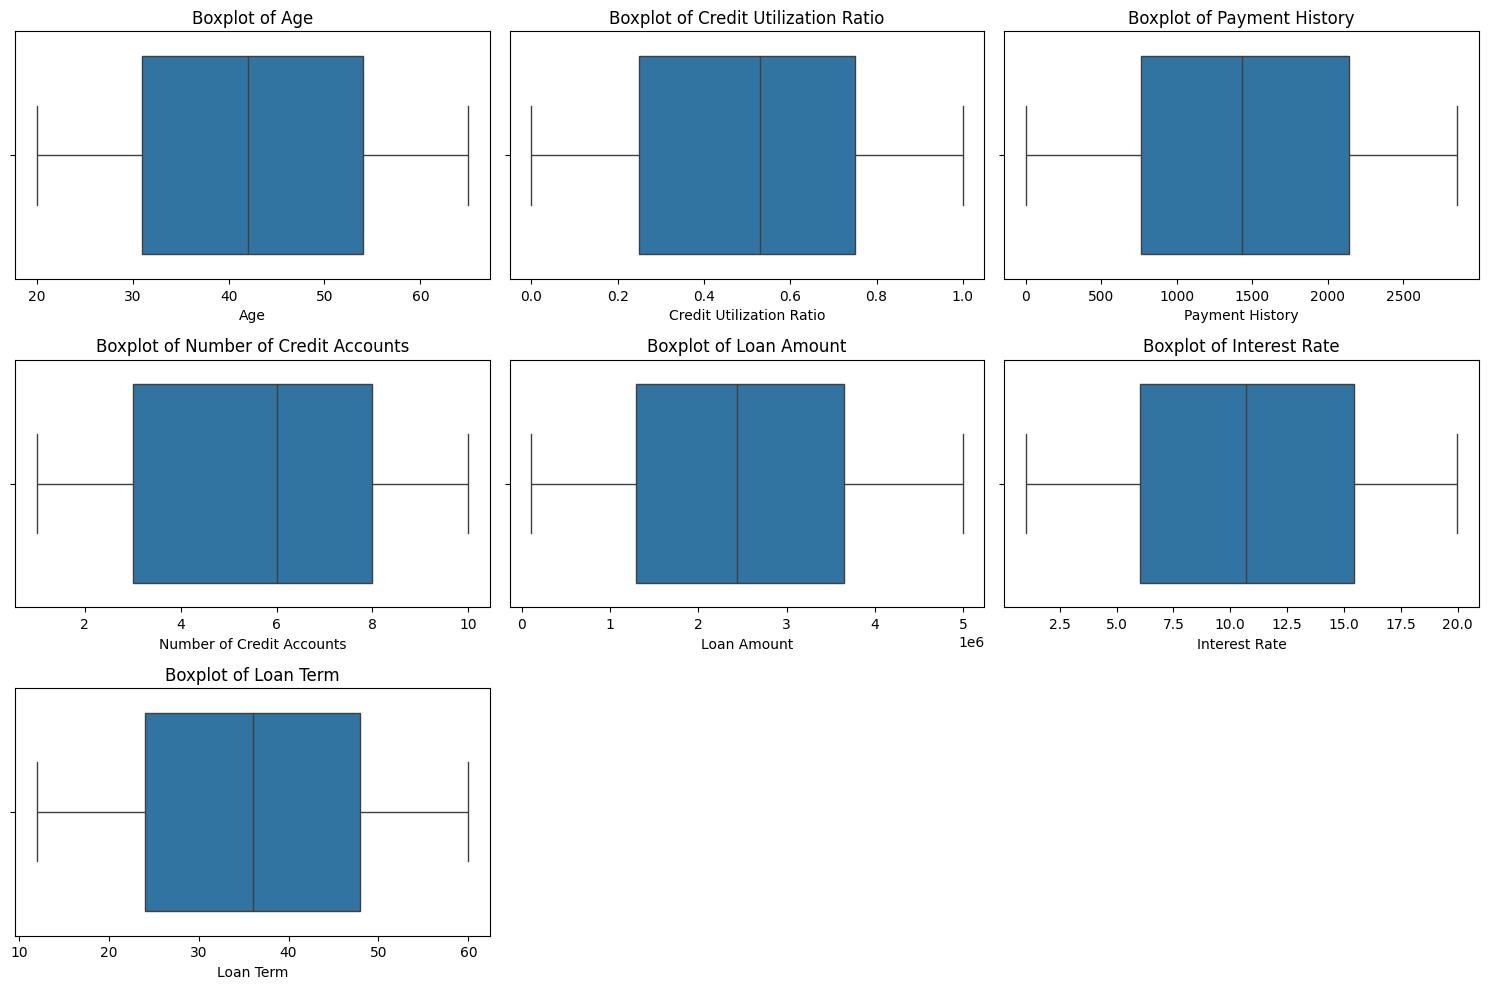

In [ ]:
#Method 1: Identifying the outliers using box plot

# Select numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Visualized outliers using boxplots to identify anomalies in numerical features.

In [ ]:
# Method 2: Identifying the outliers by using IQR method

# Dictionary to hold outliers
outliers_dict = {}

for column in numeric_features:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers[column]

    print(f"{column}: {len(outliers)} outliers")

Age: 0 outliers
Credit Utilization Ratio: 0 outliers
Payment History: 0 outliers
Number of Credit Accounts: 0 outliers
Loan Amount: 0 outliers
Interest Rate: 0 outliers
Loan Term: 0 outliers


*   To identify potential outliers, box plots were generated for all numerical
features. Based on the visual inspection and statistical range (using the IQR method), no significant outliers were detected in any of the features.

*   Therefore, no outlier treatment or removal was necessary, and the dataset was used as-is for model training.


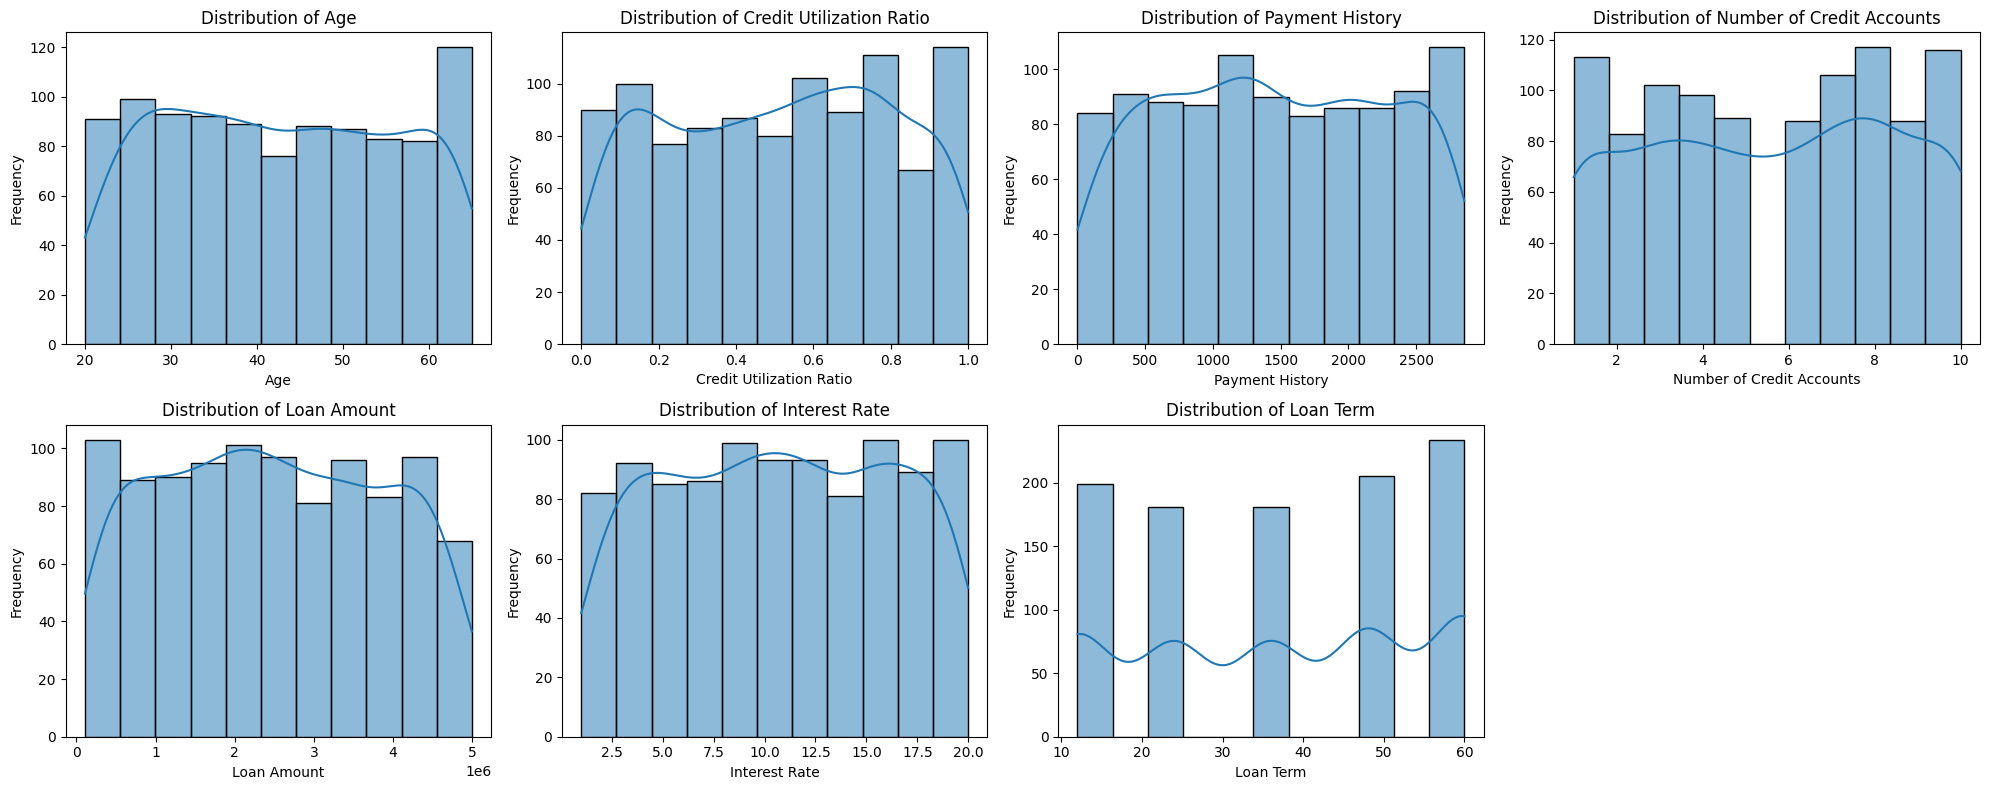

In [ ]:
##Histogram
#Histograms with KDE are an excellent way to explore the distribution of your data

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of rows and columns for subplots
n_cols = 4  # Number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Plotted histograms with KDE to understand the distribution of features.

In [ ]:
#Skewness

# check the skewness of numerical columns
df.skew(numeric_only=True)

,0
Age,0.037307
Credit Utilization Ratio,-0.047891
Payment History,0.008305
Number of Credit Accounts,-0.052239
Loan Amount,0.040701
Interest Rate,-0.020069
Loan Term,-0.095345


To understand the distribution of numerical features, histograms were plotted for variables such as Age, Loan Amount, Credit Utilization Ratio, Payment History, and others. The distributions were visually inspected for skewness. To validate this, skewness values were also calculated. All features had skewness values between -0.5 and +0.5, indicating that they are approximately symmetric. Therefore, no further transformation was required as the data is already statistically balanced.

**Feature Engineering**

In [ ]:
# Creating a target variable

def label_risk(payment_history):
    if payment_history < 1500:
        return 1  # High risk
    else:
        return 0  # Low risk

df['Risk_Flag'] = df['Payment History'].apply(label_risk)
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Risk_Flag
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,0
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,0
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,0
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan,1
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan,1


In credit scoring systems like FICO, Payment History contributes approximately 35% to the overall credit score, making it the most influential factor.
Based on this industry insight, the Payment History feature was selected as the key indicator for determining customer risk level in this project.

To convert this into a supervised classification problem, a new target variable Risk_Flag was created:

*   Customers with a Payment History score less than 1500 were labeled as "High
Risk" (1)
*   Those with a score greater than or equal to 1500 were labeled as "Low Risk" (0)

The threshold of 1500 was chosen after analyzing the statistical distribution of the Payment History feature:

Mean: 1452.81

Median: 1428.00

This threshold falls close to the center of the distribution, allowing for a balanced and statistically sound classification split between high- and low-risk customers.

This transformation enabled the application of classification models such as Logistic Regression, Decision Trees, and Random Forests to predict customer risk categories, aiding in data-driven decision-making for credit approval.

In [ ]:
df['Risk_Flag'].value_counts(normalize=True)

,proportion
Risk_Flag,
1,0.524
0,0.476


After creating the Risk_Flag target variable, the class distribution was analyzed to understand the balance between high-risk and low-risk customers.
Here this indicates that:

52.4% of customers were classified as High Risk, and

47.6% were classified as Low Risk

The dataset is fairly balanced, which is beneficial for classification models because it reduces the risk of bias toward one class. Therefore, no special handling (like resampling or class weighting) was initially required to address class imbalance.

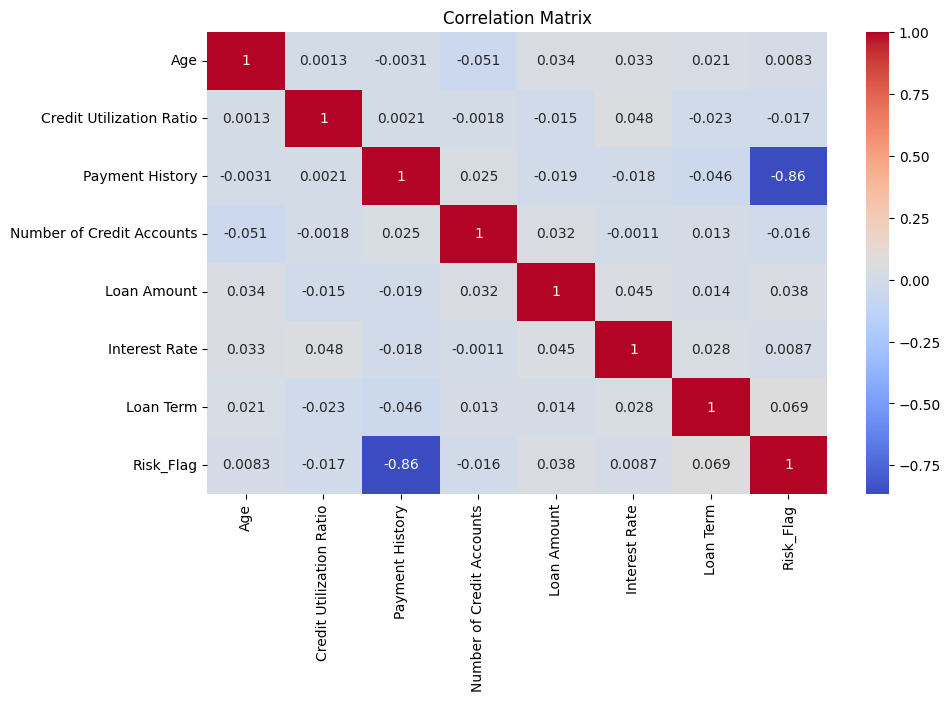

In [ ]:
# View correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

A correlation matrix was generated to explore relationships between numerical features and the target variable Risk_Flag.

*  Payment History is very important in this dataset. It has a strong negative correlation with Risk_Flag (-0.86). This means that customers who have a good payment history are much less likely to be considered risky.
*  Other features like Age, Loan Amount, Credit Utilization, and Interest Rate have very weak correlation with Risk_Flag. Even though they are not strongly related, they may still be useful in machine learning models, especially non-linear ones.
*   There is no high correlation between the input features themselves. This means there is no multicollinearity, so we can safely use all the features while building our models.








In [ ]:
#One Hot Encoding
df = pd.get_dummies(df, columns=[
    'Gender',
    'Marital Status',
    'Education Level',
    'Employment Status',
    'Type of Loan'
],dtype=int)


df.head()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Risk_Flag,Gender_Female,Gender_Male,...,Education Level_Bachelor,Education Level_High School,Education Level_Master,Education Level_PhD,Employment Status_Employed,Employment Status_Self-Employed,Employment Status_Unemployed,Type of Loan_Auto Loan,Type of Loan_Home Loan,Type of Loan_Personal Loan
0,60,0.22,2685.0,2,4675000,2.65,48,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,25,0.20,2371.0,9,3619000,5.19,60,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,30,0.22,2771.0,6,957000,2.76,12,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,58,0.12,1371.0,2,4731000,6.57,60,1,1,0,...,0,0,0,1,0,0,1,1,0,0
4,32,0.99,828.0,2,3289000,6.28,36,1,0,1,...,1,0,0,0,0,1,0,0,0,1


To prepare the dataset for machine learning models, categorical variables were transformed using One-Hot Encoding. This technique converts each unique category into a separate binary column, allowing models to process them numerically without assuming any order.

Note: Why One-Hot and not Label Encoding?
Label Encoding assigns integer values (e.g., 0, 1, 2) which can imply a false ordinal relationship between categories. Since the above features are nominal (unordered), One-Hot Encoding was preferred to ensure that each category is treated independently by the model.

# **Feature Scaling**

In [ ]:
# Features and Target
X = df.drop(['Risk_Flag'],axis=1)
y = df['Risk_Flag']

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Before training the model, feature scaling was applied to normalize the input features. This step ensures that all features contribute equally to the model and prevents those with larger ranges from dominating the learning process.

Note:
Why StandardScaler and not MinMaxScaler?

StandardScaler standardizes features by removing the mean and scaling to unit variance (mean = 0, standard deviation = 1). This is particularly suitable for algorithms like Logistic Regression, KNN, and SVM, which are sensitive to the distribution and magnitude of features.

On the other hand, MinMaxScaler scales data between 0 and 1, which is more appropriate for models that do not assume normal distribution, such as tree-based algorithms.

Since this project uses distance-based and linear models, and the feature distributions are mostly symmetric, StandardScaler was the preferred choice.

# **Supervised Learning: Credit Risk Prediction**

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 800 samples
Test set size: 200 samples


 The dataset was divided into training (80%) and testing (20%) sets to ensure that model evaluation is done on unseen data, which helps assess generalization performance.

 As a result, 800 samples were used for training the model, and 200 samples were reserved for testing.

In [ ]:
#Get Models
def get_models():
  return{
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

A function was defined to return a dictionary of multiple machine learning classifiers to be trained and compared later.

In [ ]:
# Evaluate Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score,
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
)
def evaluate_model(y_test, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }
    return metrics

 A custom function was created to evaluate models using various metrics like accuracy, precision, recall, F1-score, MAE, MSE, RMSE, and R². This provides a comprehensive performance overview.

In [ ]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)
        results[name] = metrics
         # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()
    return results

This function trains multiple models and evaluates their performance on test data. For each model, it calculates evaluation metrics and displays a confusion matrix to compare prediction accuracy and errors.


Training Decision Tree...



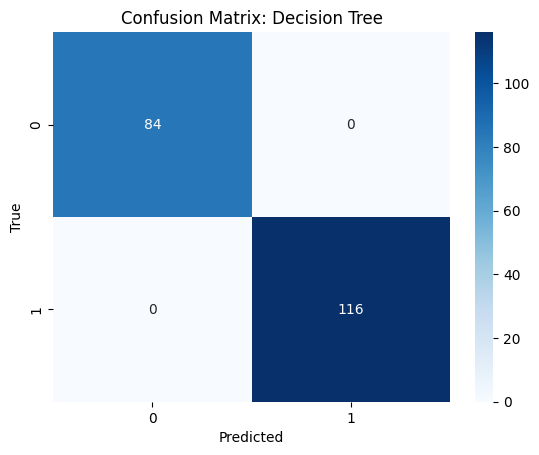


Training Random Forest...



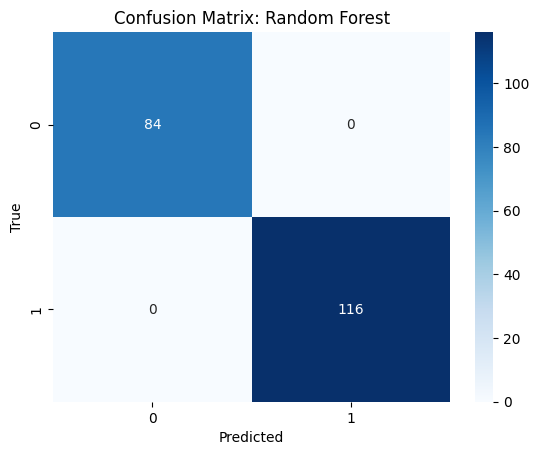


Training Logistic Regression...



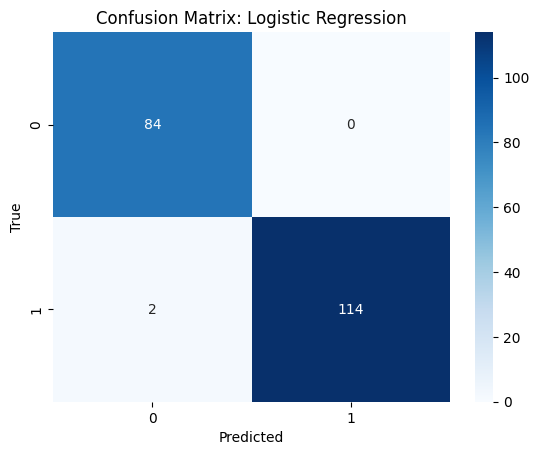


Training SVM...



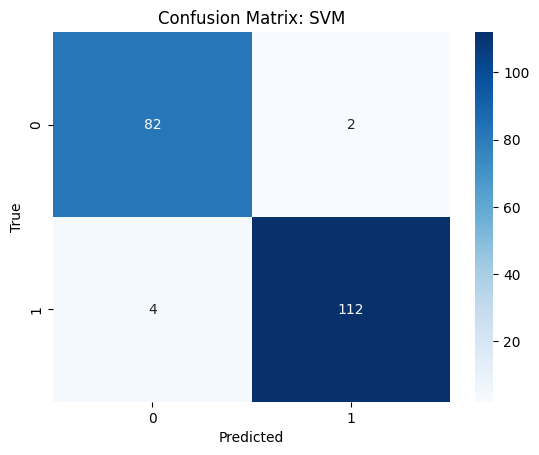

In [ ]:
models = get_models()
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

Each model is trained and evaluated using the custom metric function. Results are stored for comparison.

Observation from confusion matrix:

*   The Decision Tree model perfectly classified both low-risk and high-risk customers.

   True Positives (TP): 116 | True Negatives (TN): 84

   False Positives (FP): 0 | False Negatives (FN): 0

   No misclassifications observed.

*   Similar to the Decision Tree, the Random Forest model also achieved perfect classification.

   TP: 116 | TN: 84 | FP: 0 | FN: 0

   Random Forest is considered more robust and less prone to overfitting, so it is highly suitable for deployment.

*    The Logistic Regression model made 2 false negative predictions, meaning it incorrectly labeled 2 high-risk customers as low-risk.

     TP: 114 | TN: 84 | FP: 0 | FN: 2

     Overall, very good performance, but slightly riskier compared to Decision Tree or Random Forest.


*  The SVMmodel made 2 false positive and 4 false negative predictions.

    TP: 112 | TN: 82 | FP: 2 | FN: 4

    Least accurate among the models tested, but still reasonably good.



In [ ]:
# Display Results
df_results = pd.DataFrame(results).T.round(4)
print("\nFinal Evaluation Metrics for All Models:\n")
print(df_results)


Final Evaluation Metrics for All Models:

                     Accuracy  Precision  Recall  F1 Score  Balanced Accuracy  \
Decision Tree            1.00     1.0000  1.0000    1.0000             1.0000   
Random Forest            1.00     1.0000  1.0000    1.0000             1.0000   
Logistic Regression      0.99     1.0000  0.9828    0.9913             0.9914   
SVM                      0.97     0.9825  0.9655    0.9739             0.9709   

                      MAE   MSE  RMSE  R2 Score  
Decision Tree        0.00  0.00  0.00    1.0000  
Random Forest        0.00  0.00  0.00    1.0000  
Logistic Regression  0.01  0.01  0.01    0.9589  
SVM                  0.03  0.03  0.03    0.8768  


After training and evaluating all four classification models, we compared their
performance using key metrics: Accuracy, Precision, Recall, F1 Score, Balanced Accuracy, and Error metrics (MAE, MSE, RMSE, R² Score).

1.	Decision Tree and Random Forest achieved perfect scores across all metrics:

  •	100% Accuracy, Precision, Recall, and F1 Score.

  •	No prediction errors (MAE, MSE, RMSE = 0), and R² = 1, indicating perfect fit.

  •	However, Decision Trees can overfit, while Random Forest is more robust, making it better for real-world use.

2.	Logistic Regression performed very well, with:
   
   •	Accuracy = 99%, F1 Score = 0.9913

   •	Minor errors: MAE = 0.01, RMSE = 0.01

   •	R² Score = 0.9589, showing strong prediction capability.

   •	A good balance of performance and interpretability.

3.	Support Vector Machine (SVM) had the lowest performance among the models:

  •	Accuracy = 97%, F1 Score = 0.9739

  •	Slightly higher errors (MAE = 0.03), and R² = 0.8768

  •	Still good, but not as reliable as the other models.




In [ ]:
#Ranking(The model with the lowest average rank is your overall best performer.)
ranking = df_results.rank(ascending=False)
ranking["Average Rank"] = ranking.mean(axis=1)
ranking_sorted =ranking.sort_values("Average Rank")
print("Ranked Models:")
print(ranking_sorted)

print("\nBest Model:")
print(ranking_sorted.index[0])

Ranked Models:
                     Accuracy  Precision  Recall  F1 Score  Balanced Accuracy  \
Decision Tree             1.5        2.0     1.5       1.5                1.5   
Random Forest             1.5        2.0     1.5       1.5                1.5   
Logistic Regression       3.0        2.0     3.0       3.0                3.0   
SVM                       4.0        4.0     4.0       4.0                4.0   

                     MAE  MSE  RMSE  R2 Score  Average Rank  
Decision Tree        3.5  3.5   3.5       1.5      2.222222  
Random Forest        3.5  3.5   3.5       1.5      2.222222  
Logistic Regression  2.0  2.0   2.0       3.0      2.555556  
SVM                  1.0  1.0   1.0       4.0      3.000000  

Best Model:
Decision Tree


To identify the overall best model, we ranked all models based on their performance metrics including:
Accuracy, Precision, Recall, F1 Score, Balanced Accuracy, MAE, MSE, RMSE, and R² Score.

**Observations:**

•	Decision Tree and Random Forest both achieved the lowest average rank (2.22), making them the top-performing models overall.

•	Despite SVM having the best error metrics (lowest MAE, MSE, RMSE), it had lower classification performance (Precision, Recall, F1), which increased its overall average rank.

•	Logistic Regression showed balanced performance and ranked third.

•	R² Score was highest for Decision Tree and Random Forest (1.0), indicating perfect fit.

**Final Conclusion:**

Based on the average ranking across multiple metrics, the Decision Tree model is identified as the best-performing model, closely followed by Random Forest.
However, considering overfitting risks with a single tree, the Random Forest may still be more suitable for real-world deployment due to its robustness and better generalization.

# **Unsupervised Learning: Customer Segementation**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Scale financial features before calculating Credit Score

financial_features = ['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts']

# Apply StandardScaler
scaler = StandardScaler()
scaled_financial = scaler.fit_transform(df[financial_features])

# Calculate Credit Score using weighted sum

weights = [0.35, 0.50, 0.15]  # Must sum to 1
df['Credit Score'] = (scaled_financial * weights).sum(axis=1)
x1=df[['Credit Score']]


To enable effective customer segmentation, a custom Credit Score was engineered using key financial features:

•	Credit Utilization Ratio

•	Payment History

•	Number of Credit Accounts

These features were standardized using StandardScaler, and a weighted sum was applied to calculate the Credit Score:

•	Payment History (50%),Credit Utilization (35%),Credit Accounts (15%)

This score was used as the input for clustering, helping to group customers based on their financial behavior.

**What is Credit Score?**
    
A credit score is a number that shows how reliable a person is in repaying loans, based on their past financial behavior.

*   A high credit score means the person has a strong repayment history and is considered low risk. Lenders feel confident giving them loans with better terms.
*  A medium credit score means the person is somewhat reliable but not perfect. They are considered moderate risk. Lenders may approve loans but with slightly stricter conditions.
*   A low credit score means the person has poor repayment behavior or financial issues, making them high risk. Lenders may reject the loan or charge higher interest.





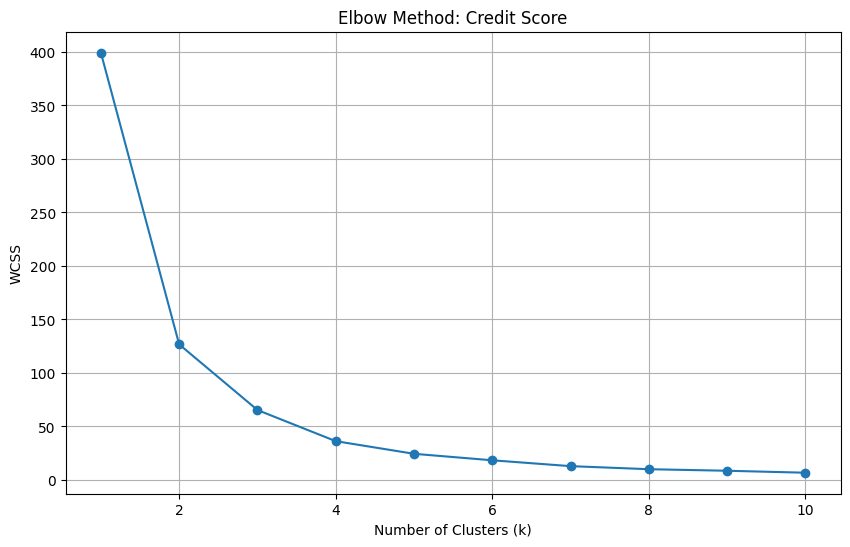

In [ ]:
# Elbow Method to determine optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: Credit Score')
plt.grid(True)
plt.show()

The Elbow Method was used to determine the optimal number of clusters (k) for customer segmentation based on the Credit Score.

From the plot, we observed a noticeable "elbow" at k = 3, where the WCSS (within-cluster sum of squares) starts to level off.

This indicates that 3 clusters is an optimal choice, balancing model performance with simplicity.

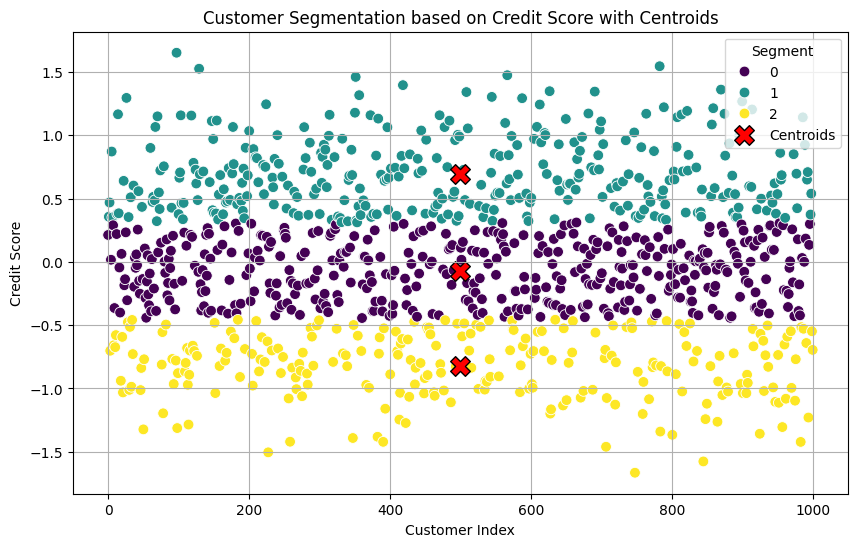

In [ ]:
# Apply KMeans clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Segment'] = kmeans.fit_predict(x1)

# Plot data points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='Credit Score', hue='Segment', palette='viridis', s=60)

#Plot centroids correctly
centroids = kmeans.cluster_centers_

# Use middle x-position for centroids (just for visual placement)
x_pos = [df.index.min() + (df.index.max() - df.index.min()) / 2] * len(centroids)

plt.scatter(
    x=x_pos,
    y=centroids.flatten(),
    s=200,
    c='red',
    edgecolor='black',
    marker='X',
    label='Centroids'
)

# Final plot formatting
plt.title('Customer Segmentation based on Credit Score with Centroids')
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

Using KMeans clustering with k = 3, customers were successfully segmented based on their Credit Score.
The scatter plot shows three distinct segments, each representing a group of customers with similar credit behavior.

In [ ]:
# Analyze clusters
segment_summary = df.groupby('Segment')['Credit Score'].describe()
print("Segment Summary:\n", segment_summary)

Segment Summary:
          count      mean       std       min       25%       50%       75%  \
Segment                                                                      
0        416.0 -0.072555  0.223773 -0.443584 -0.264950 -0.066500  0.111780   
1        336.0  0.697657  0.290027  0.312059  0.462096  0.646115  0.886019   
2        248.0 -0.823507  0.257878 -1.665483 -1.001544 -0.791951 -0.604832   

              max  
Segment            
0        0.311170  
1        1.652099  
2       -0.457070  


Here we are analyzing each customer segment by checking the summary of their credit scores. This code groups customers by their Segment and shows a detailed summary of their Credit Scores.
It calculates:

Count (number of customers in each segment)

Mean (average credit score)

Standard Deviation (how spread out the scores are)

Min & Max (lowest and highest credit score in each segment)

25%, 50%, 75% (percentile values showing score distribution)

This helps us understand how credit scores vary across segments and identify low, medium, and high-risk customer groups.

In [ ]:
# Label segments based on average Credit Score
def label_segment(row):
    if row['Segment'] == segment_summary['mean'].idxmax():
        return 'High Credit Score'
    elif row['Segment'] == segment_summary['mean'].idxmin():
        return 'Low Credit Score'
    else:
        return 'Medium Credit Score'

df['Segment_Label'] = df.apply(label_segment, axis=1)

# Optional: View final labeled DataFrame
print(df[['Credit Score', 'Segment', 'Segment_Label']].head())

   Credit Score  Segment        Segment_Label
0      0.212521        0  Medium Credit Score
1      0.356832        1    High Credit Score
2      0.469110        1    High Credit Score
3     -0.701730        2     Low Credit Score
4      0.016893        0  Medium Credit Score


After applying KMeans clustering, each customer was assigned to one of three segments based on their credit score. To make the segmentation more interpretable, the clusters were labeled as High Credit Score, Medium Credit Score, and Low Credit Score by comparing the average credit score within each cluster:

*   The segment with the highest average credit score was labeled as "High Credit Score".

*   The segment with the lowest average was labeled as "Low Credit Score".

*   The remaining segment was labeled as "Medium Credit Score".

This labeling helps in clearly identifying and targeting customers based on their financial behavior and creditworthiness.

In [ ]:
# Predicting cluster for a new customer

new_data = {
    'Credit Utilization Ratio': 0.65,
    'Payment History': 0.85,
    'Number of Credit Accounts': 6
}

new_df = pd.DataFrame([new_data])

# Scale new data using the same scaler fitted on training data
scaled_new = scaler.transform(new_df[financial_features])

# Calculate weighted Credit Score for new data
weights = [0.35, 0.50, 0.15]
new_credit_score = (scaled_new * weights).sum(axis=1)

print(f"New Credit Score value: {new_credit_score[0]:.4f}")

# Put new credit score into DataFrame with SAME column name used during training
new_credit_score_df = pd.DataFrame(new_credit_score, columns=['Credit Score'])

# Predict cluster segment
predicted_segment = kmeans.predict(new_credit_score_df)[0]

# Map predicted segment to label using segment_summary
def label_segment_by_id(segment_id):
    if segment_id == segment_summary['mean'].idxmax():
        return 'High Credit Score'
    elif segment_id == segment_summary['mean'].idxmin():
        return 'Low Credit Score'
    else:
        return 'Medium Credit Score'

predicted_label = label_segment_by_id(predicted_segment)

print(f"Predicted Segment ID: {predicted_segment}")
print(f"Segment Label: {predicted_label}")


New Credit Score value: -0.6873
Predicted Segment ID: 2
Segment Label: Low Credit Score


We tested the model with a new customer's financial details and calculated their weighted credit score as -0.6873. Using the trained KMeans model, the customer was assigned to Segment 2, which is labeled as Low Credit Score, indicating a higher risk profile.

# **Project Conclusion** :
To summarize, we successfully built a system that:

Predicted loan risk using customer payment history.

Grouped customers into segments (High, Medium, Low) based on credit score.

This helps lending companies identify risky customers early, design better loan plans, and reduce defaults.

Overall, our project supports smarter and safer lending decisions.